In [1]:
# Importing modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# reading the csv files

df1 = pd.read_csv('C:/Users/Nishi/Desktop/LGMSoC/Bike Sharing Prediction/Dataset/hour.csv')
df2 = pd.read_csv('C:/Users/Nishi/Desktop/LGMSoC/Bike Sharing Prediction/Dataset/day.csv')


# Dataset characteristics

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

*  instant: record index
*  dteday : date
*  season : season (1:springer, 2:summer, 3:fall, 4:winter)
*  yr : year (0: 2011, 1:2012)
*  mnth : month ( 1 to 12)
*  hr : hour (0 to 23)
*  holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
*  weekday : day of the week
*  workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
*  weathersit : 
*  *  1: Clear, Few clouds, Partly cloudy, Partly cloudy
*  *  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
*  *  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
*  *  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*  temp : Normalized temperature in Celsius. The values are divided to 41 (max)
*  atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
*  hum: Normalized humidity. The values are divided to 100 (max)
*  windspeed: Normalized wind speed. The values are divided to 67 (max)
*  casual: count of casual users
*  registered: count of registered users
*  cnt: count of total rental bikes including both casual and registered

In [3]:
df1.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [4]:
df2.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [5]:
# distinct values

df1.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [6]:
# we are using df1 because it has all the columns
# same as df2, but 1 extra column, i.e. 'hr' i.e. hours

df1 = df1.drop(columns=['instant', 'dteday', 'yr'])

In [7]:
# changing some numeric instances to categorical instances

columns = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in columns:
    df1[column] = df1[column].astype('category')
    
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   mnth        17379 non-null  category
 2   hr          17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weathersit  17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   hum         17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  cnt         17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


# EDA

# Exploratory Data Analysis


[Text(0.5, 1.0, 'Count of Bikes during different Weekdays')]

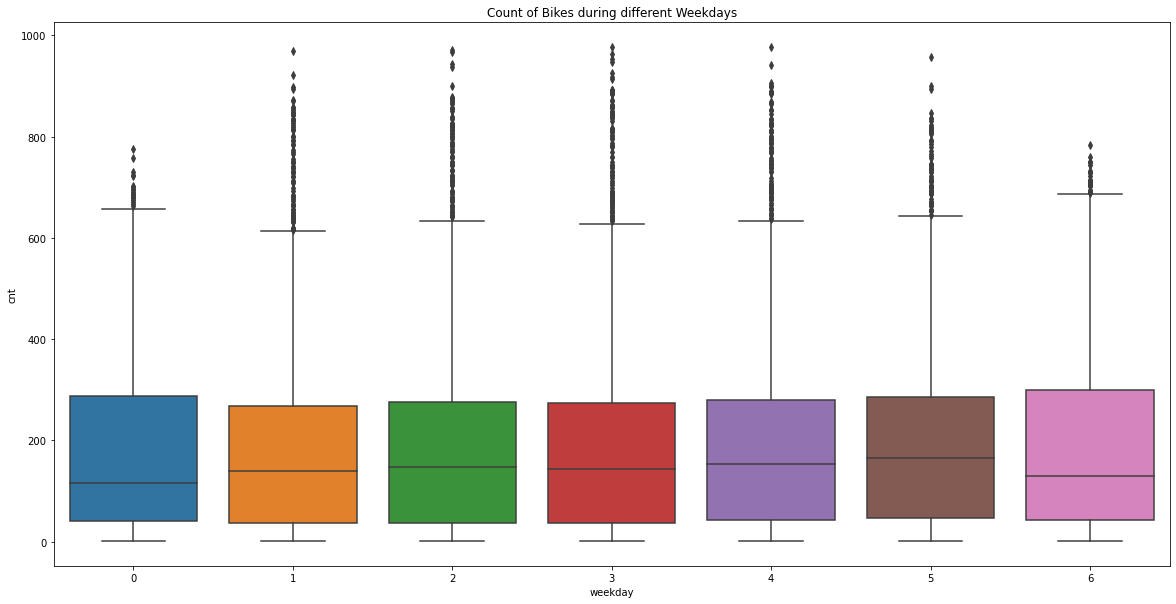

In [8]:

fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='weekday', y='cnt',data=df1, ax = ax)
ax.set(title='Count of Bikes during different Weekdays')



[Text(0.5, 1.0, 'Count of Bikes during different Seasons')]

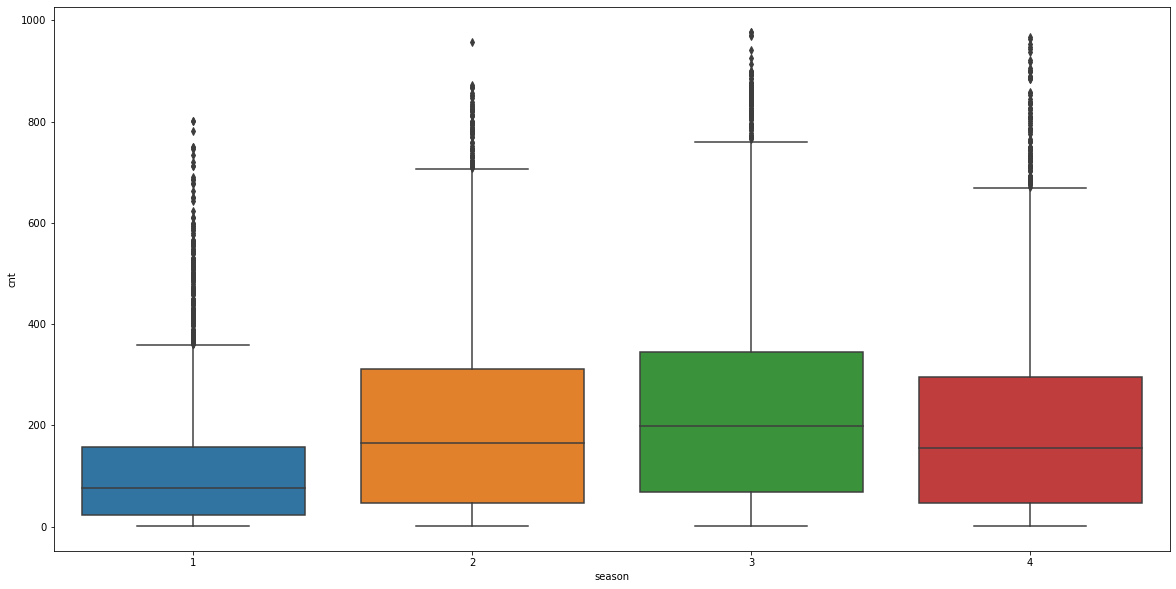

In [9]:

fig, axis = plt.subplots(figsize=(20,10))

sns.boxplot(x='season', y='cnt',data=df1, ax=axis)
ax.set(title='Count of Bikes during different Seasons')



[Text(0.5, 1.0, 'Count of Bikes during different Weekdays: Unregistered Users')]

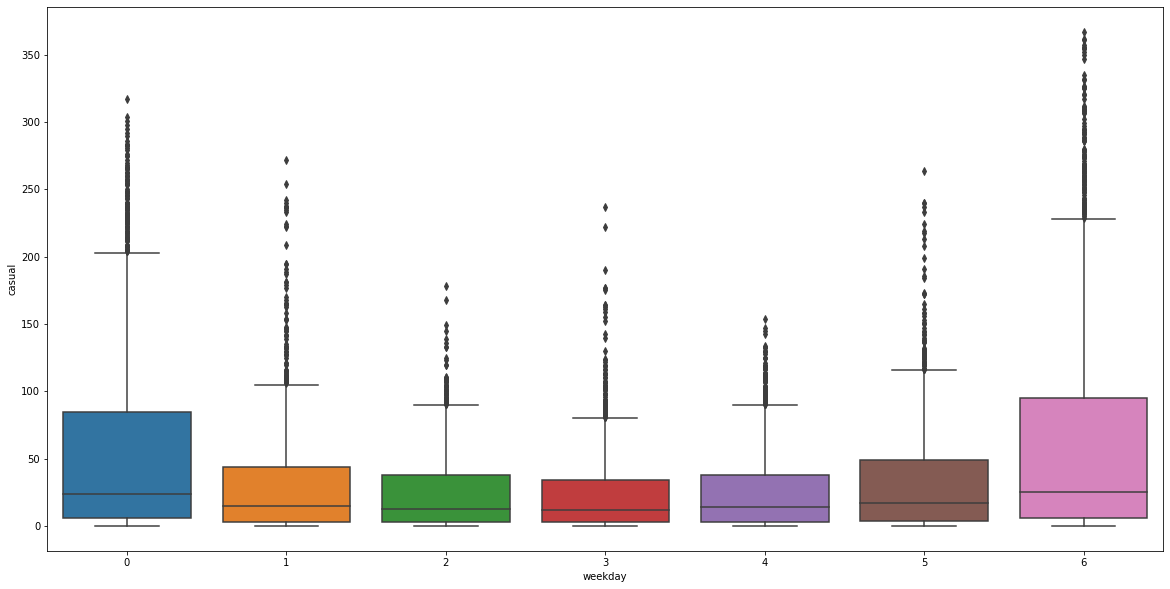

In [10]:

fig, axis = plt.subplots(figsize=(20,10))
sns.boxplot(x='weekday', y='casual',data=df1, ax=axis)
ax.set(title='Count of Bikes during different Weekdays: Unregistered Users')


# Here we observe that the count is more on Saturdays and Sundays for Unregistered Users

[Text(0.5, 1.0, 'Count of Bikes during different Weekdays: Registered Users')]

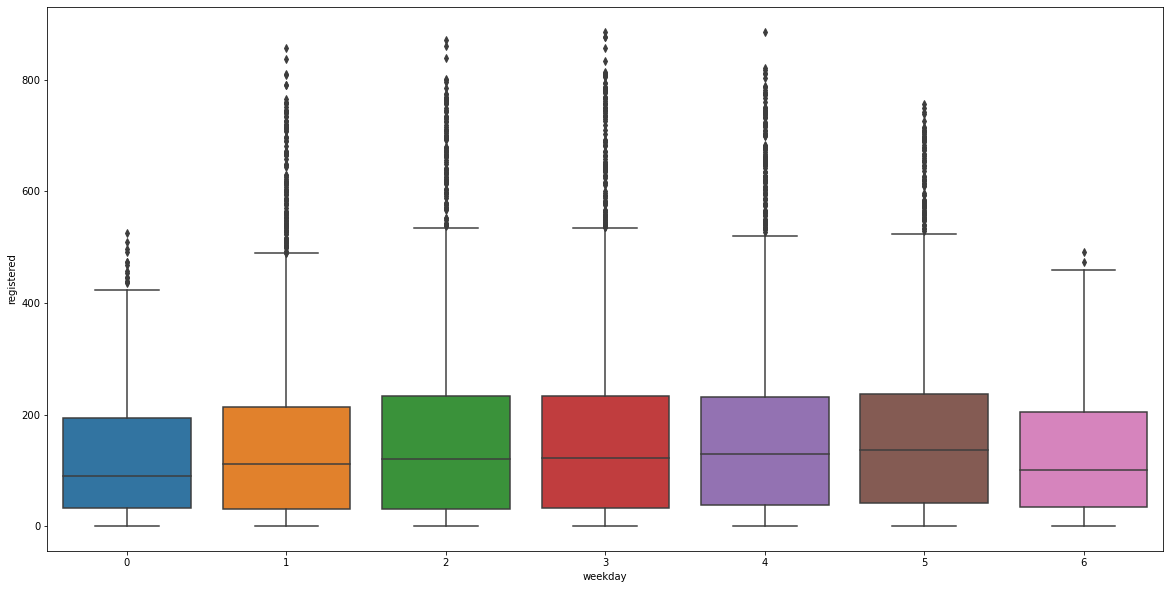

In [11]:

fig, axis = plt.subplots(figsize=(20,10))
sns.boxplot(x='weekday', y='registered',data=df1, ax=axis)
ax.set(title='Count of Bikes during different Weekdays: Registered Users')


# Here we observe that the count is a bit less on Saturdays and Sundays for Registered Users

[Text(0.5, 1.0, 'No. of Bikes in different seasons per hour')]

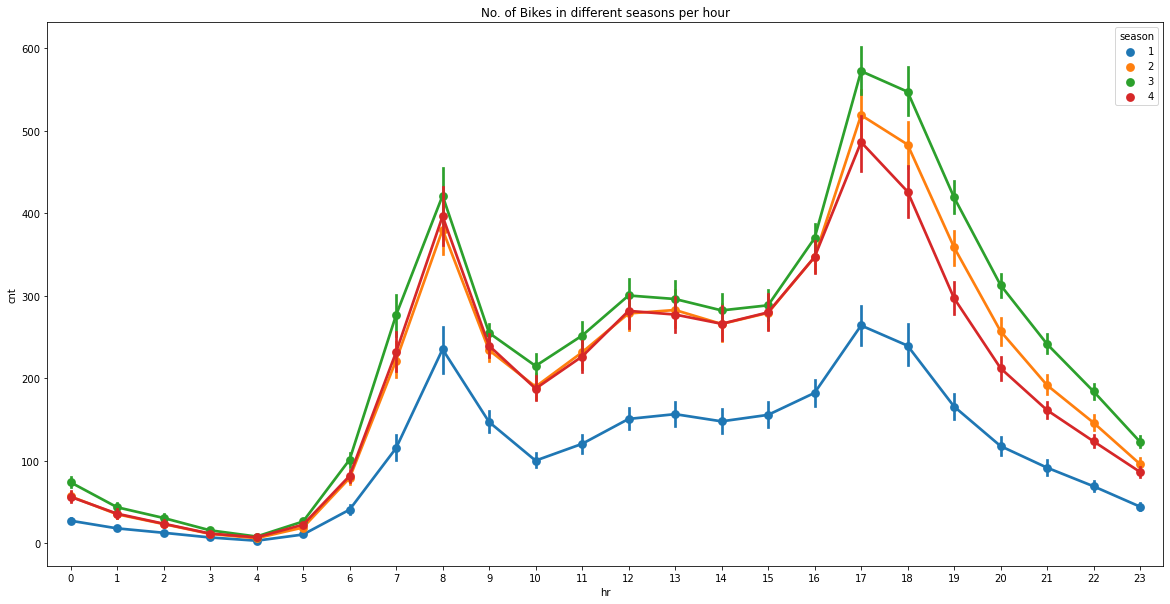

In [12]:

fig, ax = plt.subplots(figsize = (20, 10))
sns.pointplot(data = df1, x='hr', y='cnt', hue = 'season', ax = ax)
ax.set(title="No. of Bikes in different seasons per hour")


[Text(0.5, 1.0, 'Count of Bikes on different Weather')]

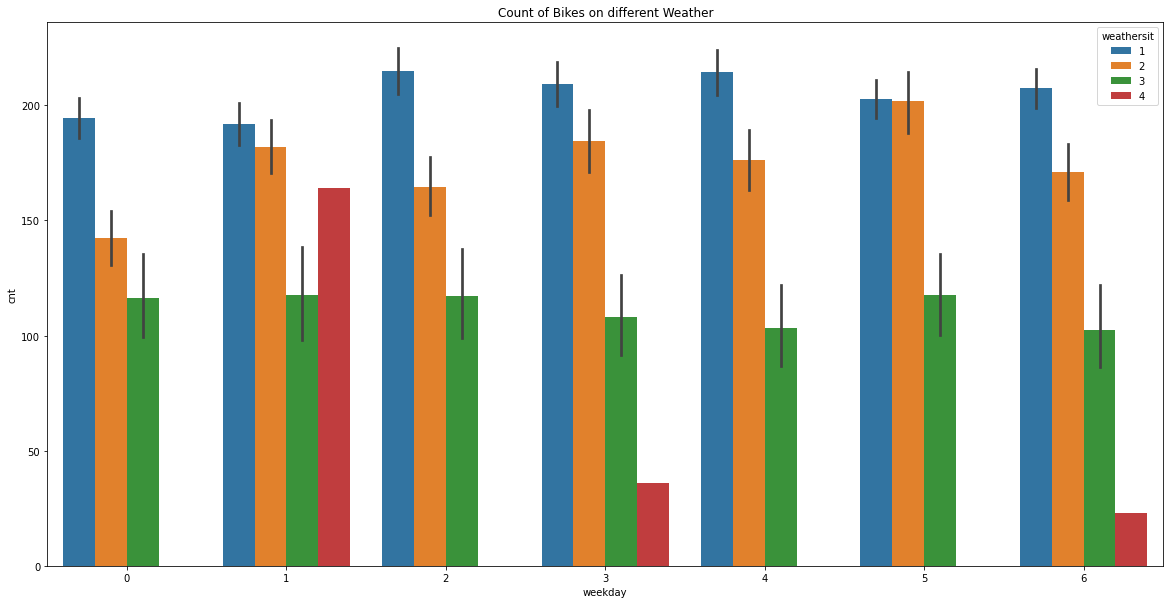

In [13]:

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='weekday', y='cnt', hue = 'weathersit', data=df1, ax=ax)
ax.set(title='Count of Bikes on different Weather')


[Text(0.5, 1.0, 'Count of Bikes in Humid Weather')]

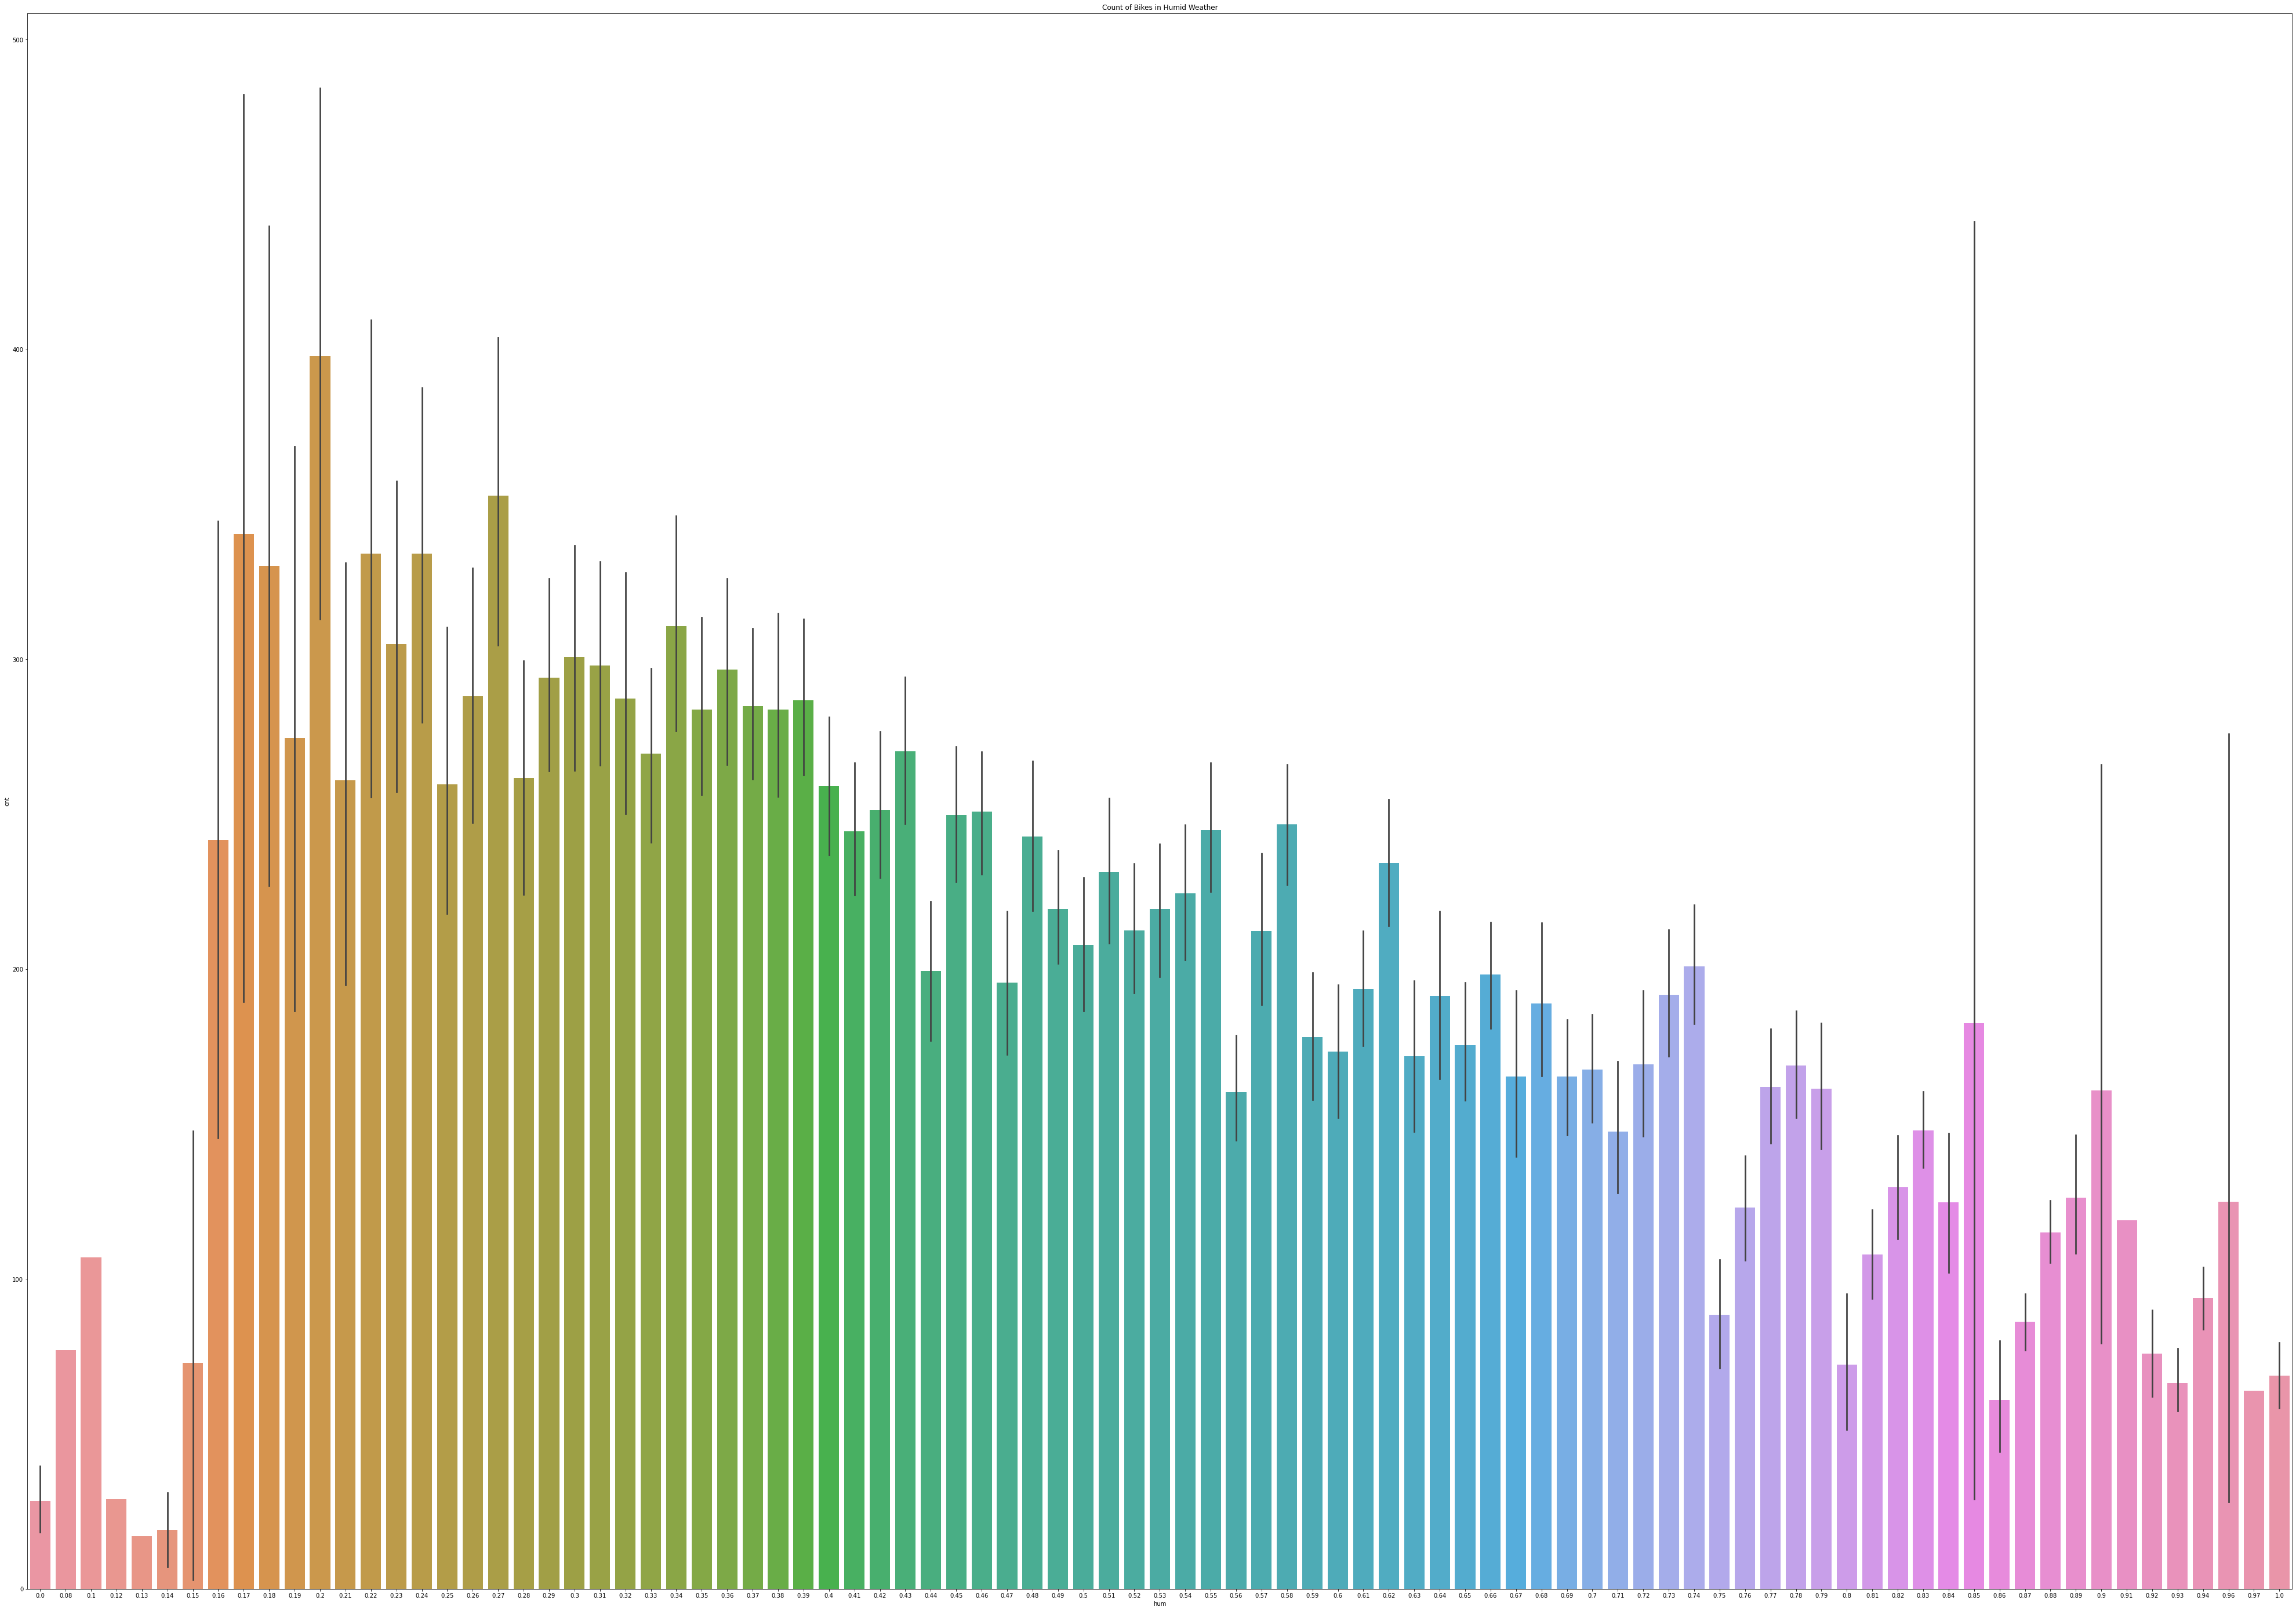

In [14]:

fig, ax = plt.subplots(figsize=(70, 50))
sns.barplot(x='hum', y='cnt', data=df1, ax=ax)
ax.set(title='Count of Bikes in Humid Weather')


[Text(0.5, 1.0, 'count of bikes during different months')]

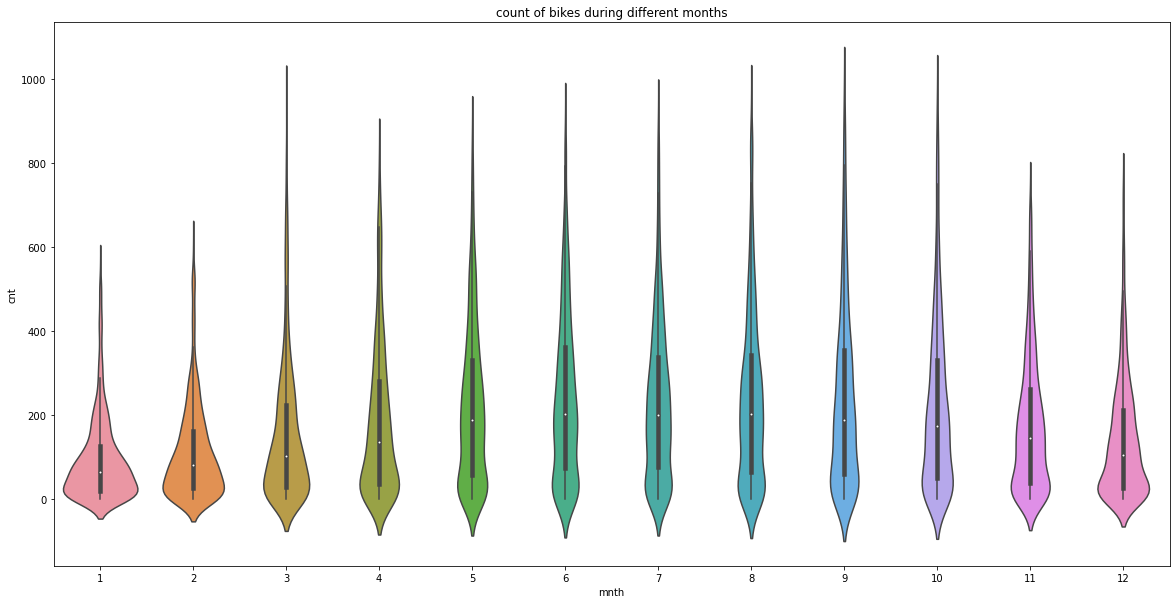

In [15]:

fig, ax = plt.subplots(figsize=(20,10))
sns.violinplot(x='mnth', y='cnt', data=df1, ax=ax)
ax.set(title='count of bikes during different months')


[Text(0.5, 1.0, 'No. of Bikes in Weekdays and Weekends in different seasons')]

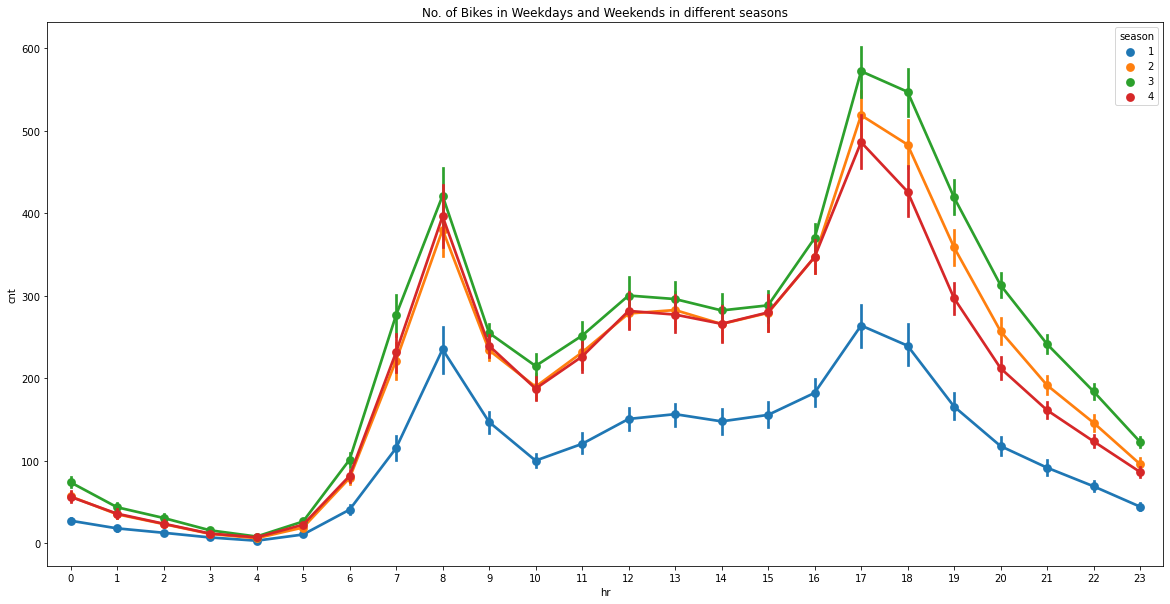

In [16]:

fig, ax = plt.subplots(figsize = (20, 10))
sns.pointplot(data = df1, x='hr', y='cnt', hue = 'season', axis = ax)
ax.set(title="No. of Bikes in Weekdays and Weekends in different seasons")


[Text(0.5, 1.0, 'No. of Bikes in Weekdays and Weekends')]

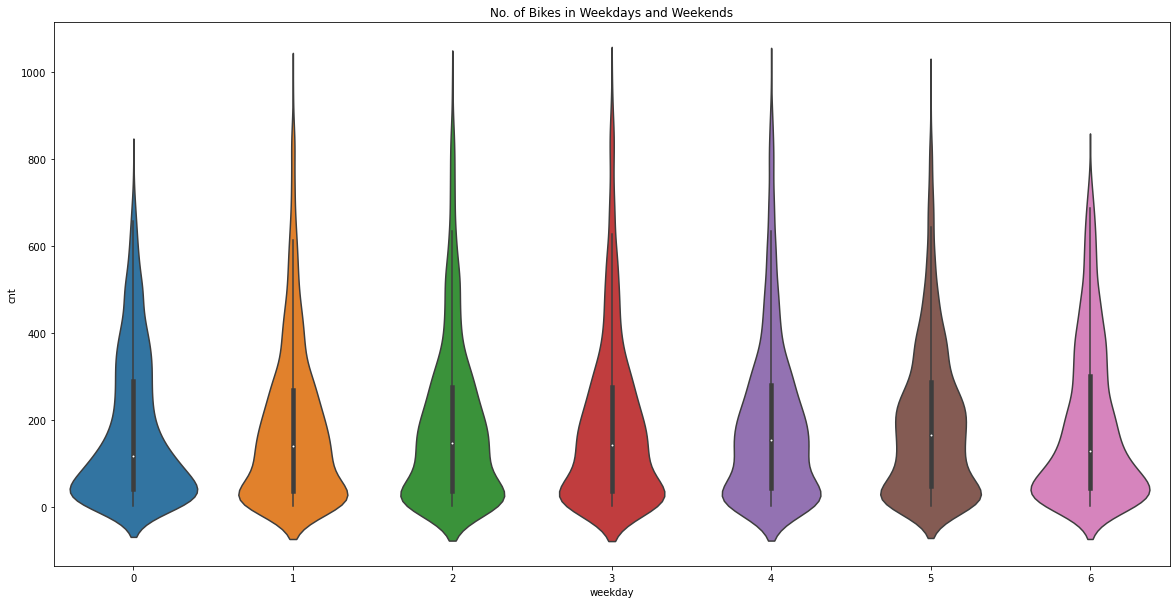

In [17]:

fig, ax = plt.subplots(figsize = (20, 10))
sns.violinplot(x='weekday', y='cnt', data = df1, ax = ax)
ax.set(title="No. of Bikes in Weekdays and Weekends")


<AxesSubplot:>

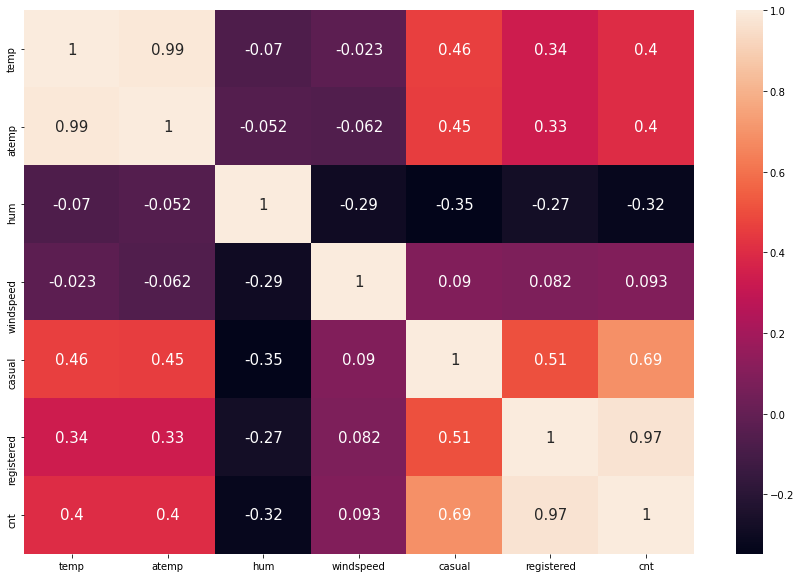

In [18]:
# Correlation Matrix

corr = df1.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot = True, annot_kws = {'size': 15})


[Text(0.5, 1.0, 'Relation between hum and cnt')]

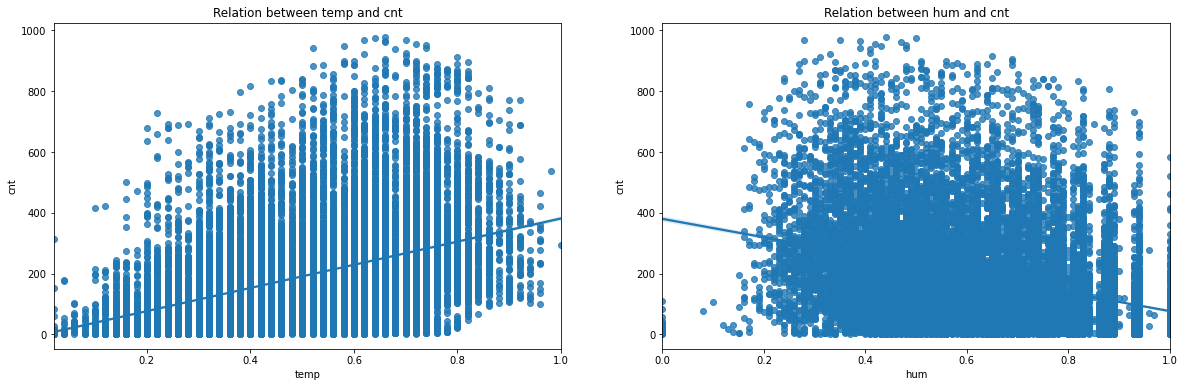

In [19]:

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 6))
sns.regplot(x=df1['temp'], y = df1['cnt'], ax = ax1)
ax1.set(title='Relation between temp and cnt')

sns.regplot(x=df1['hum'], y = df1['cnt'], ax = ax2)
ax2.set(title='Relation between hum and cnt')


# Prediction Models

# Input Split

In [20]:
df = df1

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','mnth','hr','holiday','weekday','workingday','weathersit']

for col in cols:
    df = one_hot_encoding(df, col)
df.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.2879,0.81,0.0,3,13,16,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,32,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,13,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:

X = df.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'cnt'], axis=1)
y = df['cnt']

In [22]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [23]:

print(f'''
x_train:- {x_train.shape}
y_train:- {y_train.shape}

x_test:- {x_test.shape}
y_test:- {y_test.shape}
''')



x_train:- (13034, 50)
y_train:- (13034,)

x_test:- (4345, 50)
y_test:- (4345,)



# Model Training

In [24]:
# Importing Models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection


# Linear Regression

In [25]:

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [26]:
print(f'y_pred:-\n{y_pred}\n\n')
print('y_test:-\n')

# print 10 values from y_test
count = 0
for i in y_test:
    if (count < 11):
        print(i, end=', ')
        count += 1
print('...]')

y_pred:-
[421.33472974 125.07172104  47.4679374  ...  50.37266002  85.92304816
 116.77903131]


y_test:-

425, 88, 4, 526, 13, 32, 706, 26, 2, 21, 34, ...]


In [27]:
from sklearn.metrics import mean_absolute_error
np.sqrt(mean_absolute_error(y_test, y_pred))

8.870086069157317

In [28]:
model.score(x_test, y_test)

0.6280911769442765

# Random Forest Regression

In [29]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [30]:
print(f'y_pred:-\n{y_pred}\n\n')
print('y_test:-\n')

# print 10 values from y_test
count = 0
for i in y_test:
    if (count < 11):
        print(i, end=', ')
        count += 1
print('...]')

y_pred:-
[368.15       103.05333333  13.75       ...  62.76        11.67
 134.32166667]


y_test:-

425, 88, 4, 526, 13, 32, 706, 26, 2, 21, 34, ...]


In [31]:
from sklearn.metrics import mean_absolute_error
np.sqrt(mean_absolute_error(y_test, y_pred))

7.0655981197345055

In [32]:
model.score(x_test, y_test)

0.8245701931647437

### lesser error: better model

The root mean absolute error for both models is:-
    
* RandomForestRegressor = 7.067407128774035
* LinearRegression = 8.870086069157317

which implies that Random Forest Regression has given better predictions that Linear Regression

# Accuracy:-
    
* RandomForestRegressor = 0.8262310561381094
* LinearRegression = 0.6280911769442765
